## LAB 04


In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Task 1: Advanced Exploratory Data Analysis (EDA) & Feature Engineering 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [5]:
# Randomly Null values in 5% dataset

cols = ['bathrooms', 'sqft_lot']


n_nulls = int(0.05 * len(df))
np.random.seed(42) 
null_indices = np.random.choice(df.index, size=n_nulls, replace=False)

for col in cols:
    df.loc[null_indices, col] = np.nan

In [6]:
# Checking for Null Values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms        1080
sqft_living         0
sqft_lot         1080
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
## Now Handles the missing values

df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['sqft_lot'] = df['sqft_lot'].fillna(df['sqft_lot'].mean())


In [8]:
# Now checking for null values after handling the values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### 1.  Outlier Detection and Handling: 
-  Create boxplots for price, sqft_living, and bedrooms. 
-  Identify and remove egregious outliers. A common rule is to remove 
data points that lie beyond 1.5timesIQR (Interquartile Range) from the 
first or third quartile. Justify your outlier removal strategy. For 
instance, does a house with 33 bedrooms seem plausible?

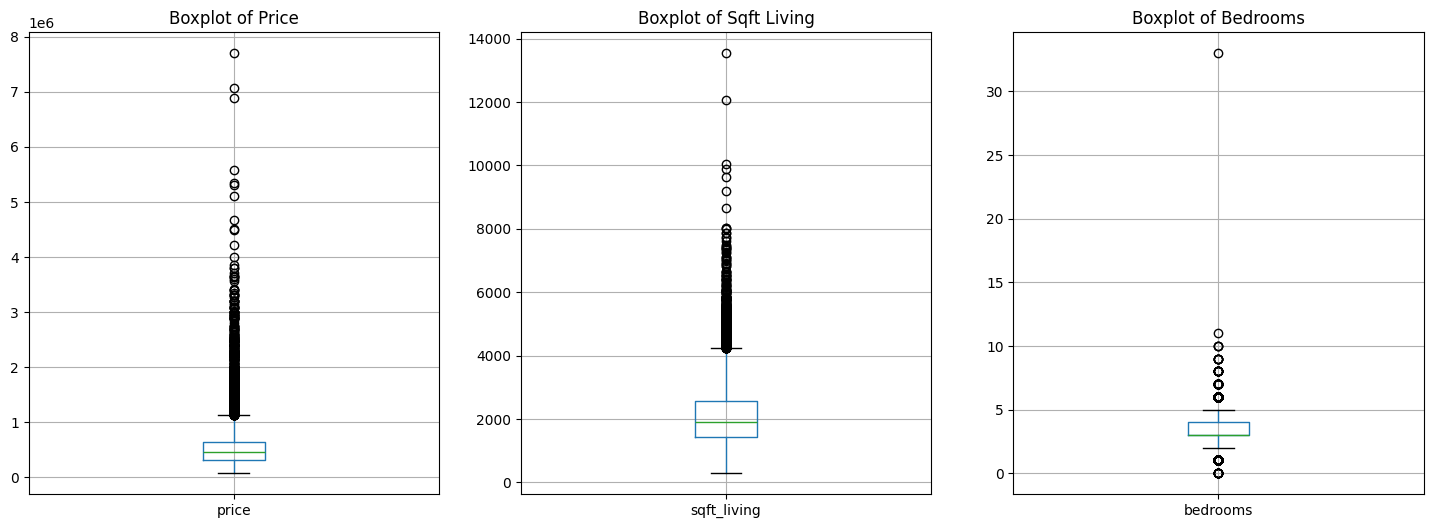

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

df.boxplot(column='price', ax=axes[0])
axes[0].set_title("Boxplot of Price")

df.boxplot(column='sqft_living', ax=axes[1])
axes[1].set_title("Boxplot of Sqft Living")

df.boxplot(column='bedrooms', ax=axes[2])
axes[2].set_title("Boxplot of Bedrooms")

plt.show()

In [10]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

cols = ['price', 'sqft_living', 'bedrooms']

for col in cols:
    df = remove_outliers(df, col)

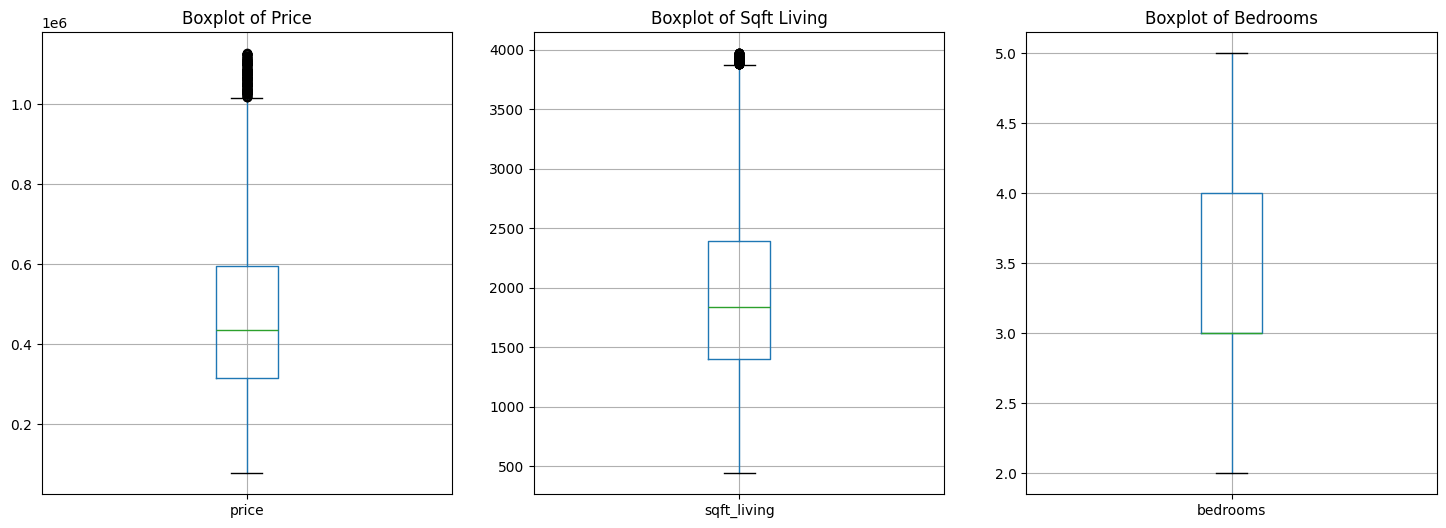

(19687, 21)

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

df.boxplot(column='price', ax=axes[0])
axes[0].set_title("Boxplot of Price")

df.boxplot(column='sqft_living', ax=axes[1])
axes[1].set_title("Boxplot of Sqft Living")

df.boxplot(column='bedrooms', ax=axes[2])
axes[2].set_title("Boxplot of Bedrooms")

plt.show()

df.shape

#### 1.  2.  Advanced Feature Engineering: Create the following new features, as they often provide more predictive power than raw data:  
- Date-Based Features: Do not drop the date column. Convert it to a 
datetime object and engineer the following: 
 -  sale_year: The year the house was sold. 
 -   sale_month: The month the house was sold. 
 -  house_age: The age of the house at the time of sale (sale_year - 
yr_built). 
-  Renovation Status: 
 -  was_renovated: A binary feature (1 if yr_renovated is not 0, 
else 0). 
 - age_since_renovation: Years since renovation. If never 
renovated, this could be the same as house_age. Think about the 
best way to handle this. 
- Ratio Features: Create at least two insightful ratio features. For 
example: 
 -  sqft_living_per_floor: sqft_living / floors. (Handle cases where 
floors might be 0). 
 -  bath_per_bed: bathrooms / bedrooms. (Handle cases where 
bedrooms might be 0).

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['house_age'] = date.today().year  - df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,70
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,74
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,92
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,60
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,38


In [13]:
# Renovation Status
df['was_renovated'] = (df['yr_renovated'] != 0).astype(int)
df.head()

current_year = date.today().year

df['age_since_renovation'] = np.where(
    df['yr_renovated'] != 0,
    current_year - df['yr_renovated'],
    df['house_age']
)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovation
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,2014,10,70,0,70
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,2014,12,74,1,34
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,2015,2,92,0,92
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,2014,12,60,0,60
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,2015,2,38,0,38


In [14]:
# Ratio Features
df['sqft_living_per_floor'] = df['sqft_living'] / df['floors'].replace(0, np.nan)
df['bath_per_bed'] = df['bathrooms'] / df['bedrooms'].replace(0, np.nan)

df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,sale_year,sale_month,house_age,was_renovated,age_since_renovation,sqft_living_per_floor,bath_per_bed
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650.0,1.0,0,0,...,-122.257,1340,5650,2014,10,70,0,70,1180.0,0.333333
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242.0,2.0,0,0,...,-122.319,1690,7639,2014,12,74,1,34,1285.0,0.750000
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000.0,1.0,0,0,...,-122.233,2720,8062,2015,2,92,0,92,770.0,0.500000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000.0,1.0,0,0,...,-122.393,1360,5000,2014,12,60,0,60,1960.0,0.750000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080.0,1.0,0,0,...,-122.045,1800,7503,2015,2,38,0,38,1680.0,0.666667


#### Task 2: Build a Sophisticated Preprocessing Pipeline 

This is the core of the assignment. Instead of manually applying transformations, 
you must automate the process using sklearn.pipeline.Pipeline and 
sklearn.compose.ColumnTransformer. This approach is less error prone and is 
standard practice in production environments. 

In [ ]:
# Numerical Features
numerical_features = [
    "sqft_living", "sqft_lot", "sqft_above", "sqft_basement",
    "lat", "long", "sqft_living15", "sqft_lot15", "house_age",
    "age_since_renovation", "sqft_living_per_floor", "bath_per_bed"
]

# Categorical Features
categorical_features = [
    "zipcode", "sale_month", "sale_year"
]

# Passthrough Features
passthrough_features = [
    "bedrooms", "bathrooms", "floors", "waterfront", "view",
    "condition", "grade", "was_renovated"
]


In [16]:
numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore') )
])

In [17]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ("numerical", numerical_pipeline, numerical_features),
    ("category", categorical_pipeline, categorical_features),
    ("passthrough", "passthrough", passthrough_features)
])


#### Task 3: Model Training and Hyperparameter Tuning

In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

rf_regressor = RandomForestRegressor(random_state=42)
gd_regressor = GradientBoostingRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42, objective="reg:squarederror")


rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", rf_regressor)
])

gd_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", gd_regressor)
])

xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", xgb_regressor)
])

In [ ]:
from sklearn.model_selection import GridSearchCV

# Example parameter grids
rf_param_grid = {
    "regressor__n_estimators": [100, 200,250],
    "regressor__max_depth": [10, 20, 50],
    "regressor__min_samples_split": [2, 5]
}

gd_param_grid = {
    "regressor__n_estimators": [100, 200,300],
    "regressor__learning_rate": [0.05, 0.1,0.2],
    "regressor__max_depth": [3, 5]
}

xgb_param_grid = {
    "regressor__n_estimators": [100, 200,250],
    "regressor__learning_rate": [0.05, 0.1],
    "regressor__max_depth": [3, 5]
}

In [20]:
# Random Forest GridSearch
grid_search_rf = GridSearchCV(
    rf_pipeline,         # Random Forest pipeline
    param_grid=rf_param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

# Gradient Boosting GridSearch
grid_search_gd = GridSearchCV(
    gd_pipeline,         # Gradient Boosting pipeline
    param_grid=gd_param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

# XGBoost GridSearch
grid_search_xgb = GridSearchCV(
    xgb_pipeline,       
    param_grid=xgb_param_grid,
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)


In [21]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop(columns=['id', 'date', 'price'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [22]:
# Fit each model
grid_search_rf.fit(X_train, y_train)
print("Best RF params:", grid_search_rf.best_params_)
grid_search_gd.fit(X_train, y_train)
print("Best GD params:", grid_search_gd.best_params_)
grid_search_xgb.fit(X_train, y_train)
print("Best XGB params:", grid_search_xgb.best_params_)

Best RF params: {'regressor__max_depth': 50, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 250}
Best GD params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 300}
Best XGB params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 250}


In [23]:
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_gd = grid_search_gd.best_estimator_.predict(X_test)
y_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test)

In [ ]:
results = {
    "RandomForest": grid_search_rf.best_score_,
    "GradientBoosting": grid_search_gd.best_score_,
    "XGBoost": grid_search_xgb.best_score_
}



{'RandomForest': np.float64(-77907.69512637664), 'GradientBoosting': np.float64(-71836.86629335403), 'XGBoost': np.float64(-72078.85814711769)}


In [26]:
from sklearn.metrics import r2_score
r2_rf = r2_score(y_test, y_pred_rf)
r2_gd = r2_score(y_test, y_pred_gd)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("RandomForest Test R²:", r2_rf)
print("GradientBoosting Test R²:", r2_gd)
print("XGBoost Test R²:", r2_xgb)

# Choose best model
results = {
    "RandomForest": r2_rf,
    "GradientBoosting": r2_gd,
    "XGBoost": r2_xgb
}

best_model_name = max(results, key=results.get)
print("Best model based on Test R²:", best_model_name)

# Get the actual trained best model
if best_model_name == "RandomForest":
    best_model = grid_search_rf.best_estimator_
elif best_model_name == "GradientBoosting":
    best_model = grid_search_gd.best_estimator_
else:
    best_model = grid_search_xgb.best_estimator_

RandomForest Test R²: 0.863625733318758
GradientBoosting Test R²: 0.8811048675039141
XGBoost Test R²: 0.880827024416309
Best model based on Test R²: GradientBoosting


In [ ]:

import numpy as np

y_pred = best_model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Model:", best_model_name)
print("Test R²:", r2)
print("Test MAE:", mae)
print("Test RMSE:", rmse)


Best Model: GradientBoosting
Test R²: 0.8811048675039141
Test MAE: 49681.385279210815
Test RMSE: 70504.83195094744


RMSE Improvement: 66.39%
              Model           RMSE
0          Baseline  209786.255677
1  Tuned Best Model   70504.831951


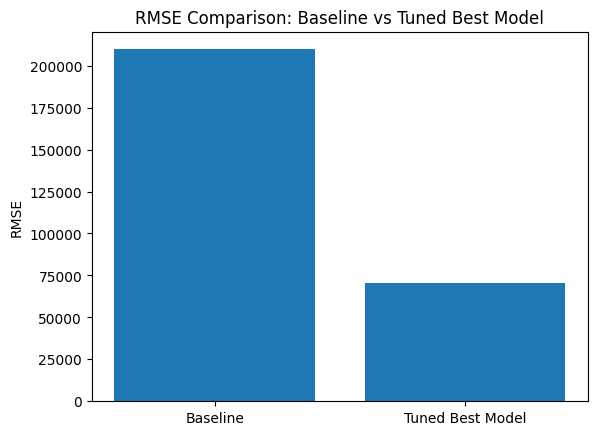

In [29]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Suppose baseline RMSE (from original notebook) was stored in variable
baseline_rmse = 209786.255677   # <-- replace with your old RMSE
new_rmse = rmse

# Percentage improvement
improvement = ((baseline_rmse - new_rmse) / baseline_rmse) * 100

print(f"RMSE Improvement: {improvement:.2f}%")

# Table
comparison_df = pd.DataFrame({
    "Model": ["Baseline", "Tuned Best Model"],
    "RMSE": [baseline_rmse, new_rmse]
})

print(comparison_df)

plt.bar(comparison_df["Model"], comparison_df["RMSE"])
plt.ylabel("RMSE")
plt.title("RMSE Comparison: Baseline vs Tuned Best Model")
plt.show()


In [37]:
def get_feature_importance(best_model, best_model_name):
    # Step 1: Extract regressor
    regressor = best_model.named_steps["regressor"]

    # Step 2: Get feature names from preprocessor
    preprocessor = best_model.named_steps["preprocessor"]
    all_features = preprocessor.get_feature_names_out()

    # Step 3: Extract importances
    importances = regressor.feature_importances_

    # ✅ Ensure lengths match
    assert len(all_features) == len(importances), f"Features ({len(all_features)}) and importances ({len(importances)}) mismatch!"

    # Step 4: Build dataframe
    feat_imp = pd.DataFrame({
        "Feature": all_features,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)

    # Step 5: Plot
    plt.figure(figsize=(10, 6))
    plt.barh(feat_imp["Feature"][:20], feat_imp["Importance"][:20])
    plt.gca().invert_yaxis()
    plt.xlabel("Feature Importance")
    plt.title(f"Top 20 Features - {best_model_name}")
    plt.show()

    return feat_imp


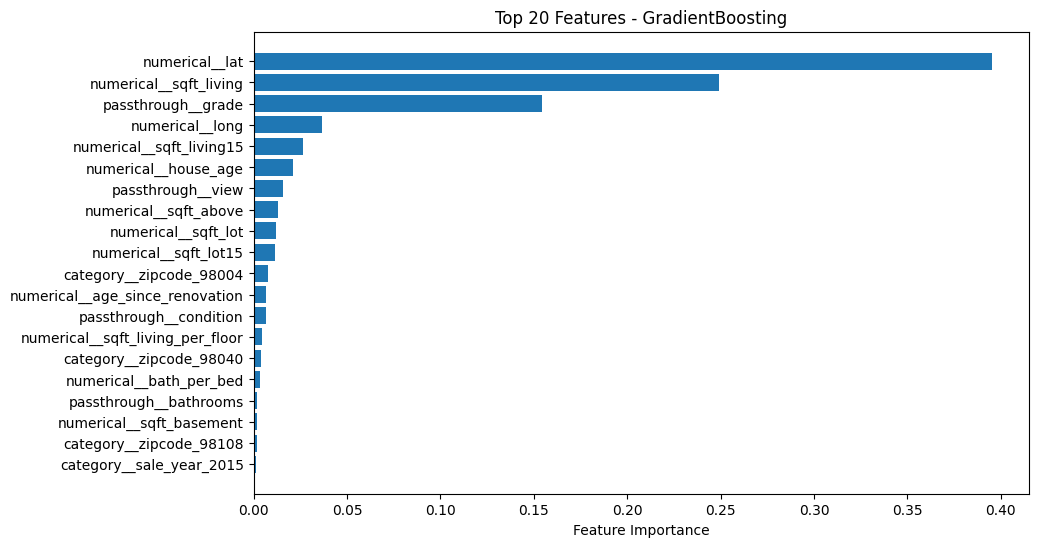

,Feature,Importance
4,numerical__lat,0.395167
0,numerical__sqft_living,0.249288
102,passthrough__grade,0.154659
5,numerical__long,0.036811
6,numerical__sqft_living15,0.026426
8,numerical__house_age,0.020957
100,passthrough__view,0.015625
2,numerical__sqft_above,0.013161
1,numerical__sqft_lot,0.011870
7,numerical__sqft_lot15,0.011419


In [40]:
feat_importance_df = get_feature_importance(best_model, best_model_name)
feat_importance_df.head(20)